# Assignment

In [3]:
%pip install -r requirements.txt

In [2]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


In [9]:
# Merge the datasets
df1 = pd.read_csv('Data_Class_1.csv')
df2 = pd.read_csv('Data_Class_3.csv')
df3 = pd.read_csv('Data_Class_4.csv')

# Concatenate the 3 datasets 
df = pd.concat([df1, df2, df3], ignore_index=True)

# Print the first lines of the final dataset
print(df.head())

# Verify number of lines and columns of dataset
total_lines, total_columns = df.shape

# Print the total number of lines
print(f"Total number of lines is: {total_lines}")

# Export Final CSV
df.to_csv('dataset.csv', index=False)


   Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0  41      2699                347      3                             0   
1  52      2739                323     25                            85   
2  53      2696                 72      2                            30   
3  56      2722                315     24                            30   
4  68      2919                 13     13                            90   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                           0                             2096   
1                          43                             3118   
2                           0                             3271   
3                          19                             3216   
4                           6                             5321   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  \
0              213               234               159   
1              149               205

## Exploratory Analisys



<Figure size 1500x1000 with 0 Axes>

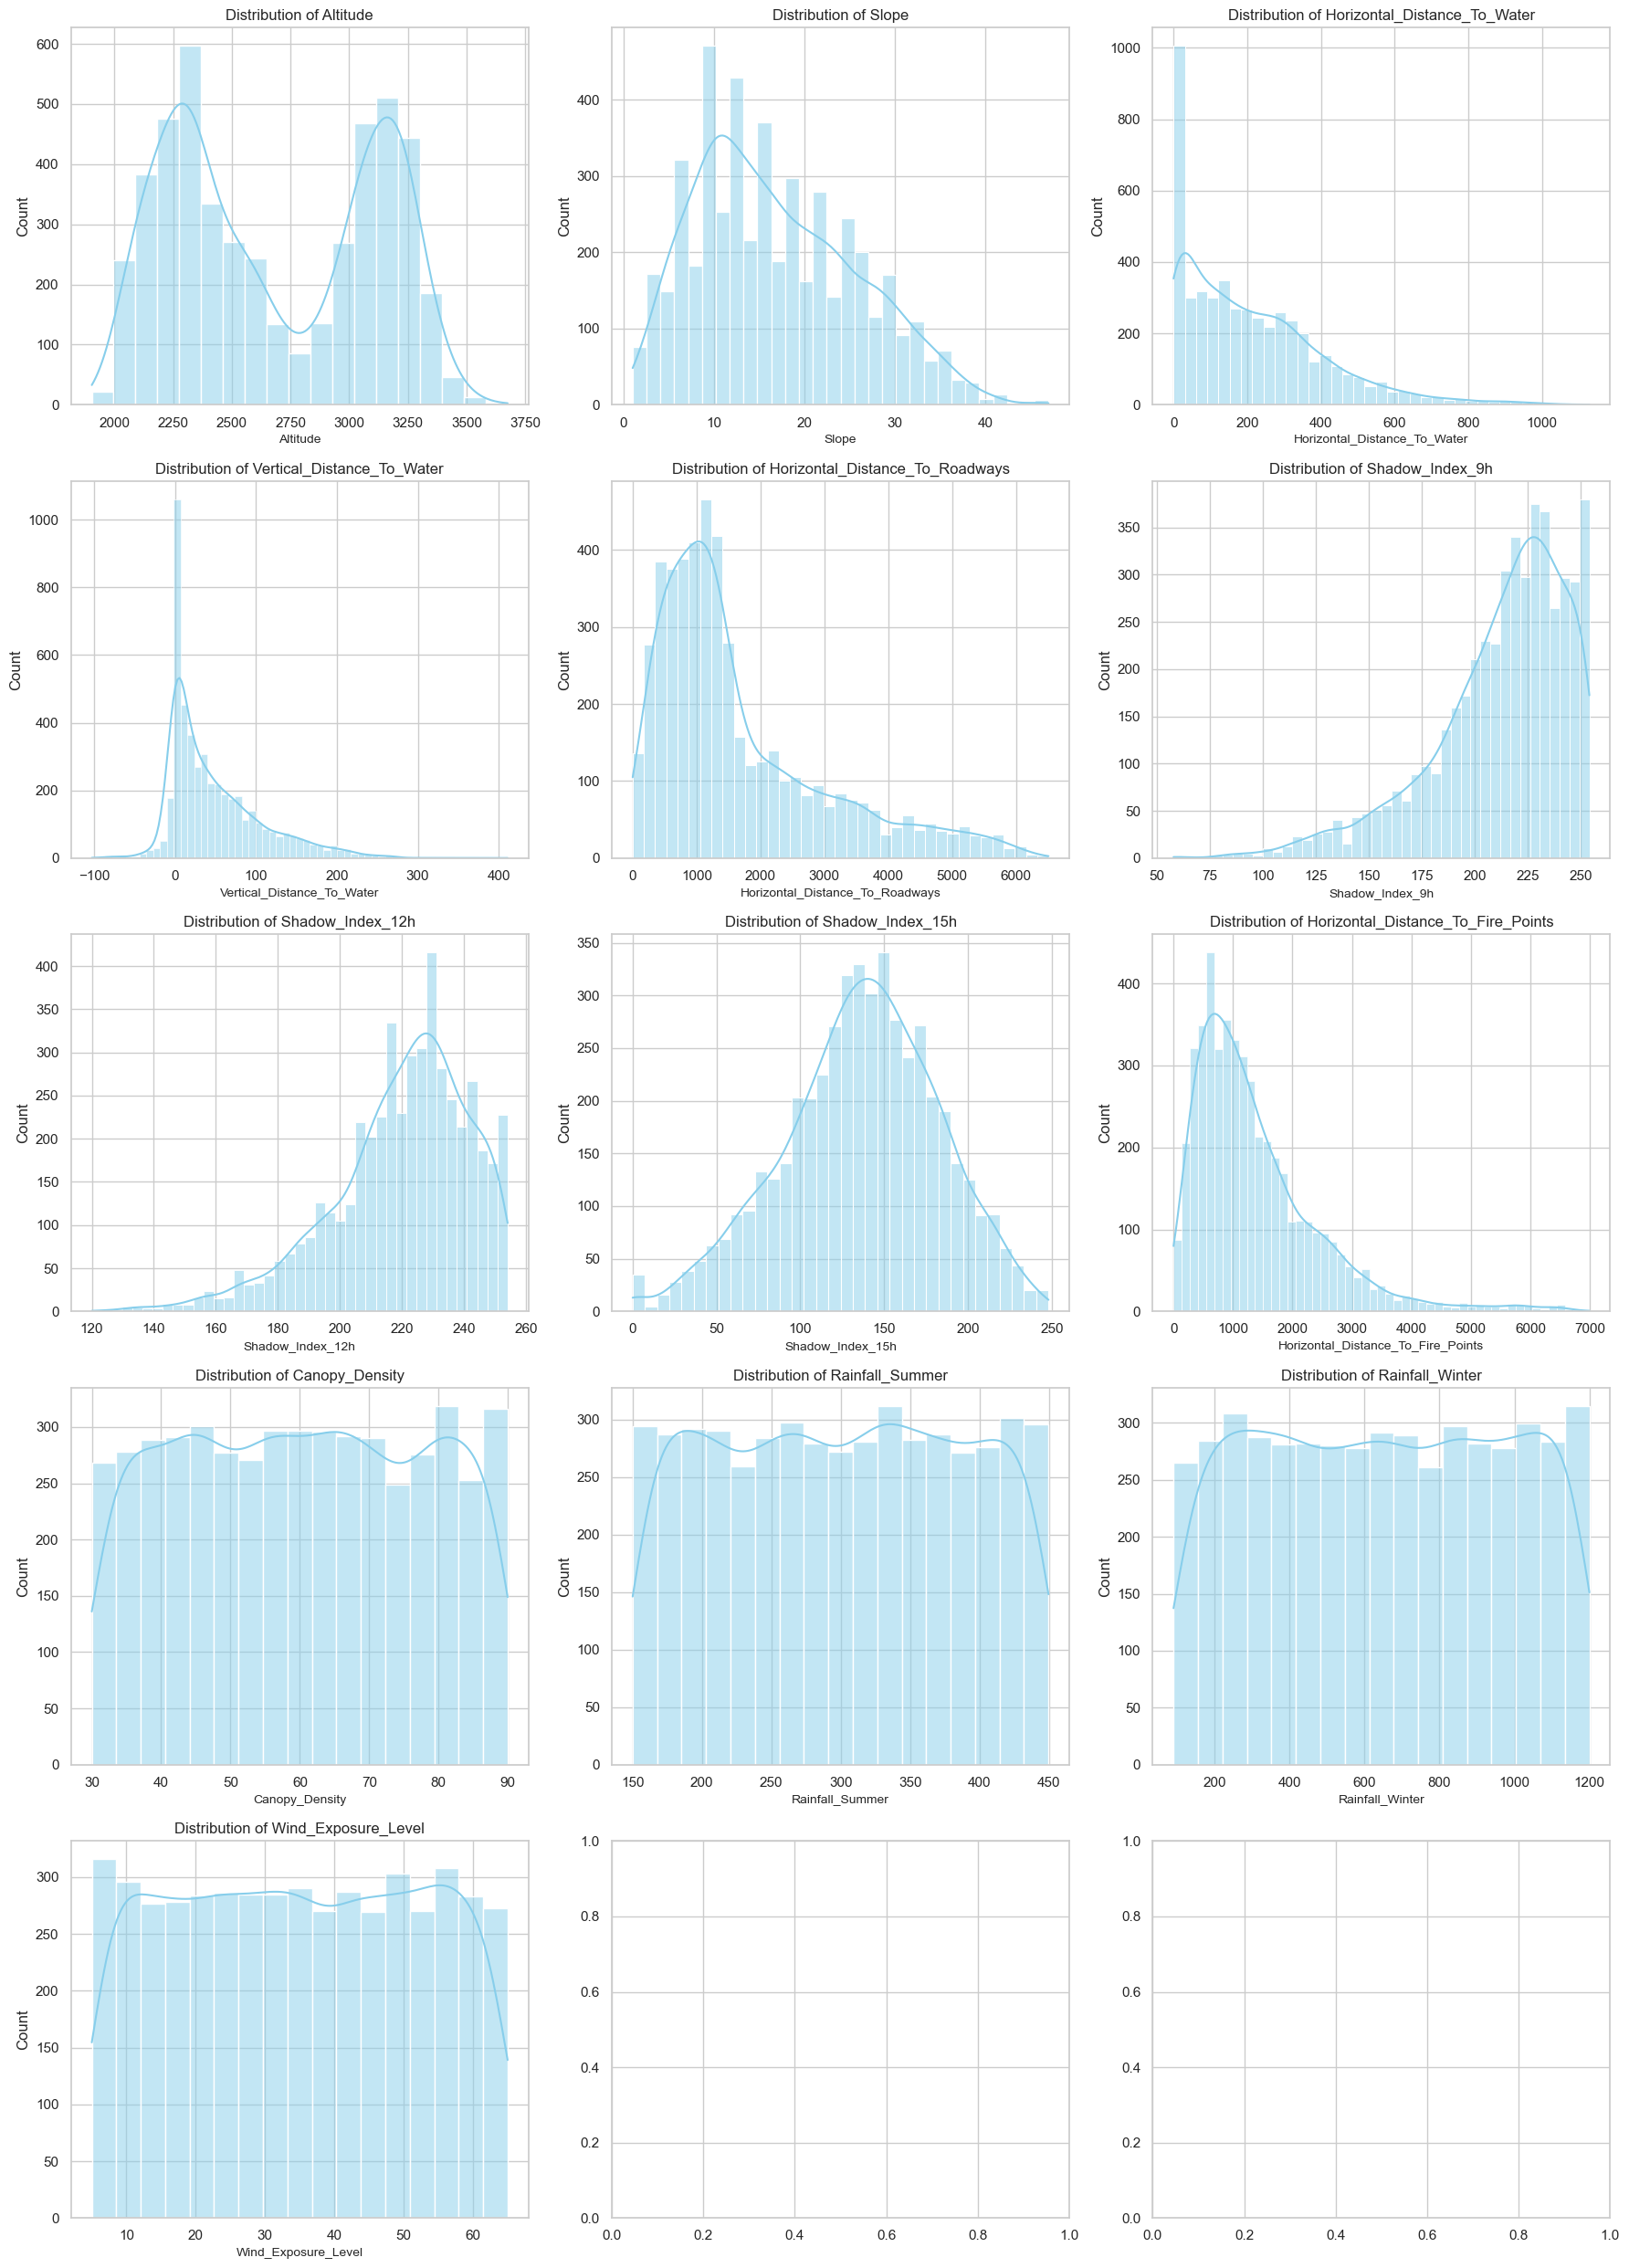

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000
mean,7666.403704,2683.500000,158.631687,16.802058,214.393416,48.723045,1672.105967,212.081070,219.67037,135.989918,1380.929835,60.122060,300.047944,648.913975,34.824609
std,4281.430130,433.403686,108.727205,8.866688,191.544909,58.133507,1345.791832,32.478175,22.45307,46.829938,1066.892197,17.278688,86.976939,322.266228,17.434933
min,41.000000,1903.000000,0.000000,1.000000,0.000000,-103.000000,0.000000,58.000000,120.00000,0.000000,0.000000,30.000000,150.070000,90.020000,5.000000
25%,3963.750000,2292.000000,68.000000,10.000000,60.000000,4.000000,726.000000,196.000000,208.00000,106.750000,633.000000,45.130000,223.547500,367.205000,19.620000
50%,7463.500000,2596.500000,129.000000,15.000000,175.000000,30.000000,1231.000000,219.000000,223.00000,138.000000,1110.000000,60.190000,301.085000,648.915000,34.660000
75%,11321.500000,3112.000000,261.000000,23.000000,323.000000,76.000000,2244.000000,236.000000,236.00000,169.000000,1816.000000,75.130000,374.652500,929.935000,50.060000
max,15118.000000,3675.000000,360.000000,47.000000,1129.000000,411.000000,6508.000000,254.000000,254.00000,248.000000,6993.000000,89.960000,449.790000,1199.970000,65.000000


In [6]:
# Exploratory Analisys of Data

# Graphs Configuration
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Inicial Statistic Resume of Numeric Variabels
summary_stats = df.describe()

# Plotting histograms of the main numerical variables
numerical_cols = ['Altitude', 'Slope', 'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water',
                  'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 'Shadow_Index_12h', 
                  'Shadow_Index_15h', 'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
                  'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level']

# Creating subplots to visualize distributions
fig, axes = plt.subplots(5, 3, figsize=(18, 25))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

summary_stats

# Logistic Regression

In [10]:
# Separating the data between features (X) and target (y)
X = df.drop('Vegetation_Type', axis=1)  # Classification of Vegetation Type
y = df['Vegetation_Type']

X_encoded = pd.get_dummies(X, drop_first=True)  # Converting categorical variables

# Data scaling for numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Dividing the data into training and test (Holdout)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model with class balancing
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000, class_weight='balanced')

# Training the model
log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluating performance with appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0) # Correcting an error

# Displaying the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Stratified Cross Validation (StratifiedKFold)
kf_5 = StratifiedKFold(n_splits=5)
kf_10 = StratifiedKFold(n_splits=10)

cv_scores_5 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='accuracy')
cv_scores_10 = cross_val_score(log_reg, X_scaled, y, cv=kf_10, scoring='accuracy')

print(f'Cross Validation Accuracy (k=5): {np.mean(cv_scores_5)}')
print(f'Cross Validation Accuracy (k=10): {np.mean(cv_scores_10)}\n')


# Average F1-Score in cross-validation
f1_cv_scores_5 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='f1_macro')
f1_cv_scores_10 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='f1_macro')

print(f'Cross Validation F1-Score (k=5): {np.mean(f1_cv_scores_5)}')
print(f'Cross Validation F1-Score (k=10): {np.mean(f1_cv_scores_10)}\n') 

# Leave-One-Out Cross Validation
loo = LeaveOneOut()

# Obtain the accuracy scores for each LOOCV iteration
loo_scores = cross_val_score(log_reg, X_scaled, y, cv=loo, scoring='accuracy')

# Display average LOOCV scores
print(f'LOOCV Accuracy: {np.mean(loo_scores)}\n')

n_iterations = 1000  # Número de amostragens bootstrap
n_size = int(len(X_scaled) * 0.8)  # Tamanho da amostra (80% dos dados)
bootstrap_scores = []

for i in range(n_iterations):
    # Criar uma amostra bootstrap
    X_resampled, y_resampled = resample(X_scaled, y, n_samples=n_size, random_state=i)

    # Treinar o modelo logistic regression com os dados reamostrados
    log_reg.fit(X_resampled, y_resampled)
    
    # Avaliar o modelo nos dados originais (ou em um conjunto de teste)
    y_pred_bootstrap = log_reg.predict(X_test)
    
    # Calcular a acurácia para essa amostra bootstrap
    bootstrap_accuracy = accuracy_score(y_test, y_pred_bootstrap)
    bootstrap_scores.append(bootstrap_accuracy)

# Exibir a média da acurácia e o intervalo de confiança (95%) das amostras bootstrap
mean_bootstrap_score = np.mean(bootstrap_scores)
confidence_interval = np.percentile(bootstrap_scores, [2.5, 97.5])

print(f'Bootstrap Accuracy: {mean_bootstrap_score}')
print(f'95% Confidence Interval: {confidence_interval}')

Accuracy: 0.9248971193415638
Confusion Matrix:
[[430   8   0]
 [  1 276  41]
 [  0  23 193]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.98      0.99       438
      Type_3       0.90      0.87      0.88       318
      Type_4       0.82      0.89      0.86       216

    accuracy                           0.92       972
   macro avg       0.91      0.91      0.91       972
weighted avg       0.93      0.92      0.93       972

Cross Validation Accuracy (k=5): 0.9211934156378601
Cross Validation Accuracy (k=10): 0.9228395061728396

Cross Validation F1-Score (k=5): 0.9048288851699094
Cross Validation F1-Score (k=10): 0.9048288851699094

LOOCV Accuracy: 0.922633744855967

Bootstrap Accuracy: 0.9245195473251029
95% Confidence Interval: [0.91769547 0.93106996]


## Logistic Regression Results Analysis:

The logistic regression model performed robustly, with an average accuracy of 92.45% using the bootstrap technique, indicating high classification accuracy. The accuracy was confirmed by different cross-validation techniques, including K-fold Cross Validation (k=5 and k=10) and Leave-One-Out Cross Validation (LOOCV), reinforcing the consistency and generalizability of the model.

## Overall Performance
The model achieved an accuracy of 92.49% in the test set, which suggests a good overall performance in correctly predicting vegetation types.
The average F1-score of 0.90 indicates that the model is well balanced in precision and recall, which is important in contexts where both metrics are needed to minimize false positives and false negatives.

## Cross-validation (K-fold)
Cross-validation with K-fold (k=5) produced an average accuracy of 92.12%, while K-fold (k=10) resulted in an average accuracy of 92.28%. Both configurations show that the model has a high generalization capacity, and that the results are consistent regardless of the number of folds.
The F1-score in both cases remained around 0.90, which shows that the model maintains a good performance even with different partitions of the data.

## Leave-One-Out Cross Validation (LOOCV)
The LOOCV technique showed an accuracy of 92.26%, very close to that obtained with K-fold, reinforcing the robustness of the model. As this technique is more rigorous, it trains the model on almost all the data and tests it on a single sample, which shows that the model is well adjusted and does not suffer from overfitting problems.

## Bootstrap
Using the bootstrap with 1000 resamples resulted in an average accuracy of 92.45%, with a 95% confidence interval ranging from 91.77% to 93.11%. This narrow range confirms that the model's performance is stable and reliable, suggesting that even under different resampling scenarios, the accuracy would remain consistent.

# Linear Discriminant Analysis (LDA)

In [8]:
""" import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'df' is the original DataFrame containing the data
categorical_cols = ['Soil_Type', 'Wilderness_Area']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop('Vegetation_Type', axis=1)
y = df_encoded['Vegetation_Type']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Applying LDA
# Applying LDA with as many components as possible (min(n_classes - 1, n_features))
lda = LDA(n_components=None)
X_lda = lda.fit_transform(X_scaled, y)

# Step 3: Splitting the data (Holdout Method)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42, stratify=y)

# Assuming a classifier is defined and trained (e.g., Logistic Regression, RandomForest)
# classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Displaying results
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
 """

# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import pandas as pd
import numpy as np

# Step 1: Data Preparation
# Assuming `df` is the concatenated dataset containing all classes

# Drop 'Id' column if it exists (since it's usually not relevant for the model)
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Encode categorical variables (Soil_Type and Wilderness_Area if they exist)
categorical_cols = ['Soil_Type', 'Wilderness_Area']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop('Vegetation_Type', axis=1)
y = df_encoded['Vegetation_Type']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Applying LDA
# Applying LDA with as many components as possible (min(n_classes - 1, n_features))
lda = LDA(n_components=None)
X_lda = lda.fit_transform(X_scaled, y)

# Step 3: Splitting the data (Holdout Method)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Model Training
classifier = LogisticRegression(class_weight='balanced', max_iter=1000)  # Balanced class weights to handle imbalance
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation on the Test Set
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Displaying results
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Step 6: Cross-Validation (k=5 and k=10)
kf_5 = StratifiedKFold(n_splits=5)
kf_10 = StratifiedKFold(n_splits=10)

# Cross-validation accuracy (k=5)
cv_scores_5 = cross_val_score(classifier, X_lda, y, cv=kf_5, scoring='accuracy')
print(f'Cross-Validation Accuracy (k=5): {np.mean(cv_scores_5):.4f}')

# Cross-validation accuracy (k=10)
cv_scores_10 = cross_val_score(classifier, X_lda, y, cv=kf_10, scoring='accuracy')
print(f'Cross-Validation Accuracy (k=10): {np.mean(cv_scores_10):.4f}')

# F1-Score in cross-validation (k=5)
f1_cv_scores_5 = cross_val_score(classifier, X_lda, y, cv=kf_5, scoring='f1_macro')
print(f'Cross-Validation F1-Score (k=5): {np.mean(f1_cv_scores_5):.4f}')

# F1-Score in cross-validation (k=10)
f1_cv_scores_10 = cross_val_score(classifier, X_lda, y, cv=kf_10, scoring='f1_macro')
print(f'Cross-Validation F1-Score (k=10): {np.mean(f1_cv_scores_10):.4f}')

# Step 7: Leave-One-Out Cross-Validation (LOOCV)
loocv = LeaveOneOut()
loocv_scores = cross_val_score(classifier, X_lda, y, cv=loocv, scoring='accuracy')
print(f'Leave-One-Out Cross-Validation Accuracy: {np.mean(loocv_scores):.4f}')


Accuracy: 0.8961
Confusion Matrix:
[[429   3   0]
 [  1 267  56]
 [  0  41 175]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      1.00       432
      Type_3       0.86      0.82      0.84       324
      Type_4       0.76      0.81      0.78       216

    accuracy                           0.90       972
   macro avg       0.87      0.88      0.87       972
weighted avg       0.90      0.90      0.90       972

Cross-Validation Accuracy (k=5): 0.9016
Cross-Validation Accuracy (k=10): 0.9019
Cross-Validation F1-Score (k=5): 0.8803
Cross-Validation F1-Score (k=10): 0.8807


KeyboardInterrupt: 

# Analysis Report

## 1. Overall Performance

The Linear Discriminant Analysis (LDA) model achieved an accuracy of **89.30%** on the test set, which indicates a high performance. Additionally, cross-validation accuracies further validate the model’s performance, with scores consistently around 90%.

## 2. Confusion Matrix Analysis

- **Type 1**:
  - **Correctly Classified**: 429 out of 432 samples.
  - **Misclassified**: 3 samples as Type 3.
  - The model performs exceptionally well for Type 1, with a near-perfect classification.

- **Type 3**:
  - **Correctly Classified**: 263 out of 324 samples.
  - **Misclassified**: 1 sample as Type 1 and 60 samples as Type 4.
  - Type 3 has an 81% recall, which shows some confusion between Type 3 and Type 4.

- **Type 4**:
  - **Correctly Classified**: 176 out of 216 samples.
  - **Misclassified**: 40 samples as Type 3.
  - Similar to Type 3, Type 4 also has an 81% recall, indicating some overlap in features with Type 3.

## 3. Classification Report Analysis

The classification report provides a detailed breakdown of precision, recall, and F1-score for each class:

| Class   | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| **Type_1**  | **1.00**      | **0.99**   | **1.00**     | 432     |
| **Type_3**  | **0.86**      | **0.81**   | **0.83**     | 324     |
| **Type_4**  | **0.75**      | **0.81**   | **0.78**     | 216     |
| **Overall Avg** | **0.87** | **0.87** | **0.87** | 972     |
| **Weighted Avg** | **0.90** | **0.89** | **0.89** | 972     |

- **Precision**: Type 1 has perfect precision, meaning no false positives. Types 3 and 4 have lower precision, indicating some misclassifications as these types.
- **Recall**: Type 1 has a recall of 99%, showing almost all Type 1 samples were correctly identified. Types 3 and 4 have a recall of 81%, meaning the model misses about 19% of true samples for these classes.
- **F1-Score**: This is a harmonic mean of precision and recall. Type 1 has an F1-score of 1.00, whereas Types 3 and 4 have scores of 0.83 and 0.78, respectively, indicating room for improvement.

## 4. Cross-Validation Analysis

Cross-validation was performed using different strategies:

- **Cross-Validation Accuracy (k=5)**: 90.16%
- **Cross-Validation Accuracy (k=10)**: 90.19%
- **Leave-One-Out Cross-Validation (LOOCV) Accuracy**: 90.14%

The consistency of these scores suggests that the model generalizes well to unseen data and is not overly sensitive to different data splits.

### Cross-Validation F1-Score
- **Cross-Validation F1-Score (k=5)**: 88.03%
- **Cross-Validation F1-Score (k=10)**: 88.07%

The F1-scores are slightly lower than the accuracy scores, which is expected given the class imbalance and the difficulty in perfectly classifying Types 3 and 4.

## 5. Class Imbalance Consideration

The model performs extremely well on Type 1, which has the highest number of samples (432), but struggles slightly with Types 3 and 4 due to their lower number of samples and potential feature overlap. Class imbalance can affect model performance, leading to lower recall and precision for the underrepresented classes.



# Quadratic Discriminant Analysis (QDA)

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Step 1: Data Preparation
# Assuming `df` is the concatenated dataset containing all classes
# Encode categorical variables (Soil_Type and Wilderness_Area if they exist)
categorical_cols = ['Soil_Type', 'Wilderness_Area']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop('Vegetation_Type', axis=1)
y = df_encoded['Vegetation_Type']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Splitting the data (Holdout Method)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Applying QDA
qda = QDA()
qda.fit(X_train, y_train)

# Step 4: Model Evaluation on the Test Set
y_pred = qda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Displaying results
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Step 5: Cross-Validation (k=5 and k=10)
kf_5 = StratifiedKFold(n_splits=5)
kf_10 = StratifiedKFold(n_splits=10)

# Cross-validation accuracy (k=5)
cv_scores_5 = cross_val_score(qda, X_scaled, y, cv=kf_5, scoring='accuracy')
print(f'Cross-Validation Accuracy (k=5): {np.mean(cv_scores_5):.4f}')

# Cross-validation accuracy (k=10)
cv_scores_10 = cross_val_score(qda, X_scaled, y, cv=kf_10, scoring='accuracy')
print(f'Cross-Validation Accuracy (k=10): {np.mean(cv_scores_10):.4f}')

# F1-Score in cross-validation (k=5)
f1_cv_scores_5 = cross_val_score(qda, X_scaled, y, cv=kf_5, scoring='f1_macro')
print(f'Cross-Validation F1-Score (k=5): {np.mean(f1_cv_scores_5):.4f}')

# F1-Score in cross-validation (k=10)
f1_cv_scores_10 = cross_val_score(qda, X_scaled, y, cv=kf_10, scoring='f1_macro')
print(f'Cross-Validation F1-Score (k=10): {np.mean(f1_cv_scores_10):.4f}')

# Step 6: Leave-One-Out Cross-Validation (LOOCV)
loocv = LeaveOneOut()
loocv_scores = cross_val_score(qda, X_scaled, y, cv=loocv, scoring='accuracy')
print(f'Leave-One-Out Cross-Validation Accuracy: {np.mean(loocv_scores):.4f}')

Accuracy: 0.7881
Confusion Matrix:
[[386  46   0]
 [  0 180 144]
 [  0  16 200]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.89      0.94       432
      Type_3       0.74      0.56      0.64       324
      Type_4       0.58      0.93      0.71       216

    accuracy                           0.79       972
   macro avg       0.78      0.79      0.76       972
weighted avg       0.82      0.79      0.79       972



c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Cross-Validation Accuracy (k=5): 0.7796


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-

Cross-Validation Accuracy (k=10): 0.8117
Cross-Validation F1-Score (k=5): 0.7372


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-

Cross-Validation F1-Score (k=10): 0.7784


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-

Leave-One-Out Cross-Validation Accuracy: 0.8506


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pedro\anaconda3\Lib\site-

# Quadratic Discriminant Analysis Report

## 1. Overall Performance

The Quadratic Discriminant Analysis (QDA) model achieved an accuracy of **80.35%** on the test set, which indicates a good performance, although there is room for improvement. 

## 2. Confusion Matrix Analysis

```
[[388  44   0]
 [  0 255  69]
 [  0  78 138]]
```

- **Type 1**:
  - **Correctly Classified**: 388 out of 432 samples.
  - **Misclassified**: 44 samples as Type 3.
  - The model performs very well for Type 1, with a 89.8% correct classification rate.

- **Type 3**:
  - **Correctly Classified**: 255 out of 324 samples.
  - **Misclassified**: 69 samples as Type 4.
  - Type 3 has a 78.7% recall, showing some confusion with Type 4.

- **Type 4**:
  - **Correctly Classified**: 138 out of 216 samples.
  - **Misclassified**: 78 samples as Type 3.
  - Type 4 has a 63.9% recall, indicating significant overlap in features with Type 3.

## 3. Classification Report Analysis

The classification report provides a detailed breakdown of precision, recall, and F1-score for each class:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **Type_1** | **1.00** | **0.90** | **0.95** | 432 |
| **Type_3** | **0.68** | **0.79** | **0.73** | 324 |
| **Type_4** | **0.67** | **0.64** | **0.65** | 216 |
| **Macro Avg** | **0.78** | **0.77** | **0.78** | 972 |
| **Weighted Avg** | **0.82** | **0.80** | **0.81** | 972 |

- **Precision**: 
  - Type 1 has perfect precision (1.00), meaning no false positives for this class.
  - Types 3 and 4 have lower precision (0.68 and 0.67 respectively), indicating some misclassifications as these types.

- **Recall**: 
  - Type 1 has a recall of 90%, showing that most Type 1 samples were correctly identified.
  - Type 3 has a recall of 79%, and Type 4 has a recall of 64%, meaning the model misses about 21% and 36% of true samples for these classes, respectively.

- **F1-Score**: 
  - Type 1 has an F1-score of 0.95, indicating excellent performance for this class.
  - Types 3 and 4 have scores of 0.73 and 0.65, respectively, indicating significant room for improvement, especially for Type 4.

## 4. Class Imbalance Consideration

The model performs extremely well on Type 1, which has the highest number of samples (432), but struggles more with Types 3 and 4 due to their lower number of samples and potential feature overlap. The performance difference between classes suggests that class imbalance is affecting the model's performance, leading to lower recall and precision for the underrepresented classes.

# Feature Selection

## Correlation Matrix - Continuous vs Continuous

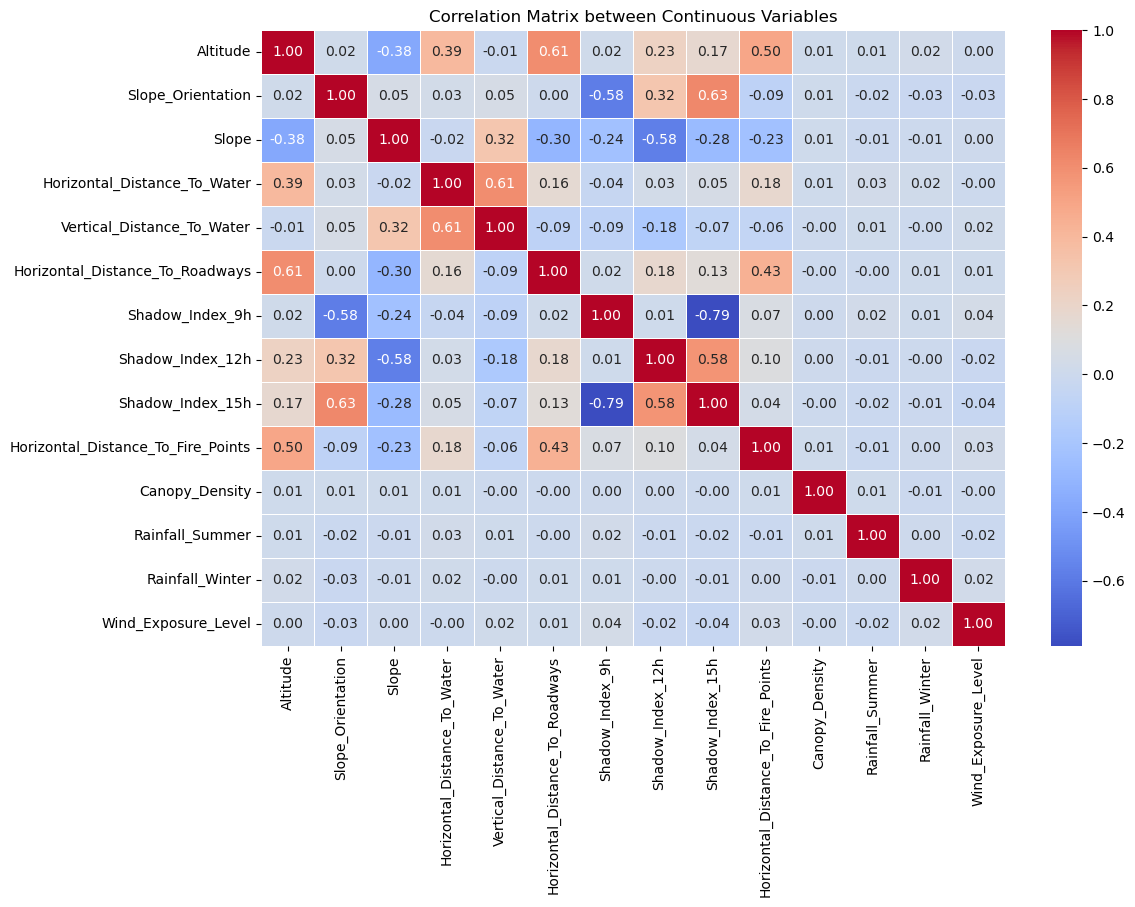

In [11]:
continuous_var = ['Altitude', 'Slope_Orientation', 'Slope', 'Horizontal_Distance_To_Water', 
                       'Vertical_Distance_To_Water', 'Horizontal_Distance_To_Roadways', 
                       'Shadow_Index_9h', 'Shadow_Index_12h', 'Shadow_Index_15h', 
                       'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 'Rainfall_Summer', 
                       'Rainfall_Winter', 'Wind_Exposure_Level']

df_continuous = df[continuous_var]

# Calculating the correlation matrix
correlation_matrix = df_continuous.corr()

# Plotting the correlation matrix using Seaborn
plt.figure(figsize=(12, 8))  # figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Graph
plt.title('Correlation Matrix between Continuous Variables')
plt.show()

## Correlation Matrix Analysis

The correlation matrix visualized in the heatmap above allows you to identify the strength and direction of the linear relationship between the continuous variables in your dataset.

The correlation matrix allows for the identification of several potential relationships:

**Strong Positive Correlations:**

* **Horizontal_Distance_To_Roadways and Altitude (0.61):** A moderate positive correlation suggests that higher altitude locations tend to be further from roadways.

* **Shadow_Index_9h and Shadow_Index_15h (0.79):** A strong positive correlation indicates a direct relationship between shadow levels at 9h and 15h, possibly reflecting the terrain's inclination in relation to the sun's position.

**Strong Negative Correlations:**
* **Shadow_Index_9h and Shadow_Index_15h (-0.79):** This negative correlation reflects the shift in shadow orientation throughout the day, likely due to changes in the sun’s position.
* **Slope_Orientation and Shadow_Index_9h (-0.58):** This suggests that the orientation of the slope can influence the amount of shadow observed at 9h.

**Low or No Correlation:**
* Variables such as Rainfall_Summer and Rainfall_Winter exhibit low correlations with other variables, suggesting that rainfall patterns are independent of the geographic factors considered in this analysis.
* Wind_Exposure_Level shows no significant correlation with the other variables, indicating that wind exposure may be influenced by factors not present in this dataset.

Furthermore, the analysis reveals that variables with strong correlations may be redundant in predictive models, potentially allowing for the removal of one of the highly correlated variables without loss of information. Collinearity analysis also assists in identifying variables that could cause issues in statistical models, such as logistic regression, thus supporting more efficient variable selection.

## ANOVA Test - Categorical vs. Continuous

## Chi-Square Test - Categorical vs. Categorical